# Task 1: Import Required Libraries and Packages

In [1]:
import pandas as pd 
import numpy as np
from skimage import measure as sm
from pyts.preprocessing.discretizer import KBinsDiscretizer
import matplotlib.pyplot as plt
from matplotlib import cm, colors


## Task 2: Import the Time Series Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/zhouhaoyi/ETDataset/main/ETT-small/ETTh1.csv')


In [3]:
df.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


In [4]:
len(df)

17420

## Task 3: Truncate and Plot the DataFrame

In [5]:
ett = df.truncate(after = 999)

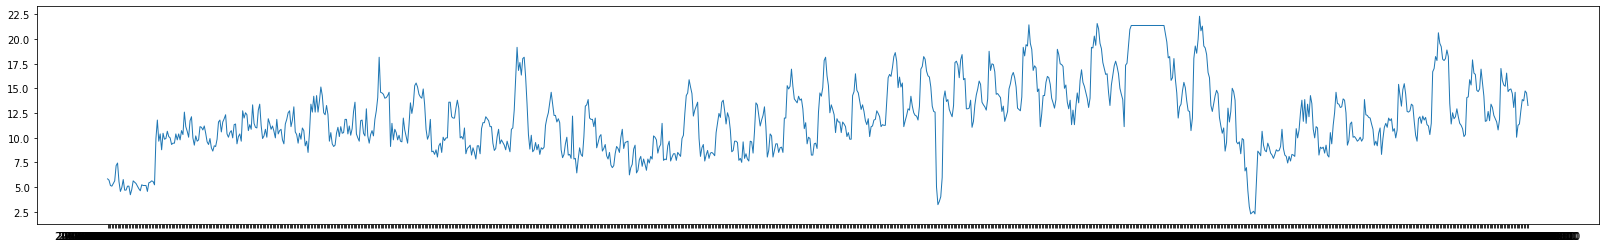

In [6]:
fig = plt.figure(figsize=(28,4)) 
plt.plot(ett['date'], ett['HUFL'], linewidth=1)
plt.show()

## Task 4: Discretize the Data

In [7]:
n_bins = 10
strategy = 'quantile'
discretizer = KBinsDiscretizer(n_bins = n_bins, strategy = strategy, raise_warning = False)
X = ett['HUFL'].values.reshape(1, -1)
ett['HUFL_disc'] = discretizer.fit_transform(X)[0]
# View the resulting dataframe
ett.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,HUFL_disc
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,0
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,0
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001,0
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001,0
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000,0


## Task 5: Create the Adjacency Matrix

In [8]:
m_adj = np.zeros((n_bins, n_bins))
for k in range(len(ett.index) - 1):
    # Matrix Iteration
    index = ett['HUFL_disc'][k]
    next_index = ett['HUFL_disc'][k+1]
    m_adj[next_index][index] += 1    
    
print(m_adj)

[[72. 15.  8.  1.  2.  1.  1.  0.  0.  0.]
 [16. 47. 22.  5.  8.  2.  0.  1.  0.  0.]
 [ 7. 22. 32. 27.  9.  3.  0.  2.  0.  0.]
 [ 3. 10. 21. 25. 19. 11.  5.  2.  0.  0.]
 [ 1.  5. 11. 22. 31. 17. 12.  4.  2.  0.]
 [ 1.  1.  4.  9. 22. 40. 15. 11.  1.  0.]
 [ 0.  1.  2.  4.  9. 19. 29. 23.  6.  1.]
 [ 1.  0.  2.  3.  2.  8. 22. 33. 25.  1.]
 [ 0.  0.  0.  0.  2.  2.  8. 16. 53. 19.]
 [ 0.  0.  0.  0.  1.  1.  1.  5. 13. 79.]]


## Task 6: Calculate the Markov Matrix

In [9]:
mtm = m_adj/m_adj.sum(axis=0)
print(mtm)

[[0.71287129 0.14851485 0.07843137 0.01041667 0.01904762 0.00961538
  0.01075269 0.         0.         0.        ]
 [0.15841584 0.46534653 0.21568627 0.05208333 0.07619048 0.01923077
  0.         0.01030928 0.         0.        ]
 [0.06930693 0.21782178 0.31372549 0.28125    0.08571429 0.02884615
  0.         0.02061856 0.         0.        ]
 [0.02970297 0.0990099  0.20588235 0.26041667 0.18095238 0.10576923
  0.05376344 0.02061856 0.         0.        ]
 [0.00990099 0.04950495 0.10784314 0.22916667 0.2952381  0.16346154
  0.12903226 0.04123711 0.02       0.        ]
 [0.00990099 0.00990099 0.03921569 0.09375    0.20952381 0.38461538
  0.16129032 0.11340206 0.01       0.        ]
 [0.         0.00990099 0.01960784 0.04166667 0.08571429 0.18269231
  0.31182796 0.2371134  0.06       0.01      ]
 [0.00990099 0.         0.01960784 0.03125    0.01904762 0.07692308
  0.23655914 0.34020619 0.25       0.01      ]
 [0.         0.         0.         0.         0.01904762 0.01923077
  0.08602151

## Task 7: Create the Markov Transition Field

In [10]:
n_t = len(ett.index)
mtf = np.zeros((n_t, n_t))

for i in range(n_t):
    for j in range(n_t):
        mtf[i, j] = mtm[ett['HUFL_disc'][i]][ett['HUFL_disc'][j]]*100


## Task 8: Visualize the Markov Transition Field

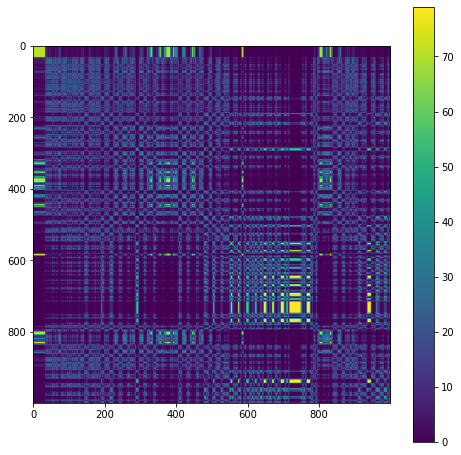

In [11]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(mtf)
plt.colorbar()

plt.show()

## Task 9: Downsample the Markov Transition Field

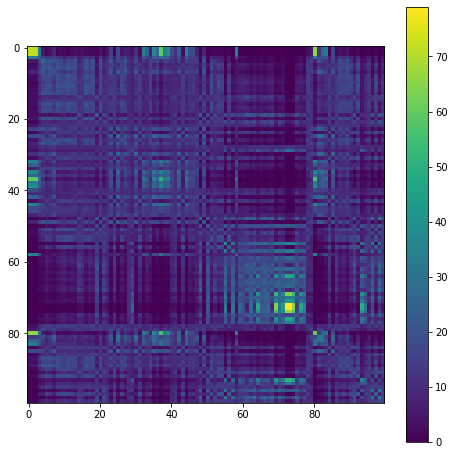

In [12]:
mtf_reduced = sm.block_reduce(mtf, block_size=(10, 10), func=np.mean)

fig = plt.figure(figsize=(8, 8))

plt.imshow(mtf_reduced)
plt.colorbar()

plt.show()

## Task 10: Plot Self-Transition Probabilities on Time Series Data

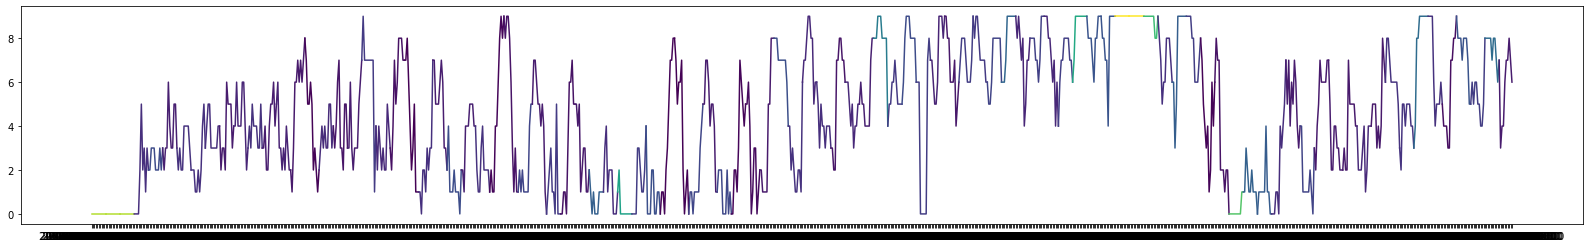

In [13]:
mtf_diag = [mtf_reduced[i][i] for i in range(len(mtf_reduced))]
fig, ax = plt.subplots(figsize=(28, 4))
norm = colors.Normalize(vmin=np.min(mtf_diag), vmax=np.max(mtf_diag))
cmap = cm.viridis
for i in range(0, n_t, 10):
    ax.plot(ett['date'][i:i+10+1], ett['HUFL_disc'][i:i+10+1], c = cmap(norm(mtf_diag[int(i/10)])))

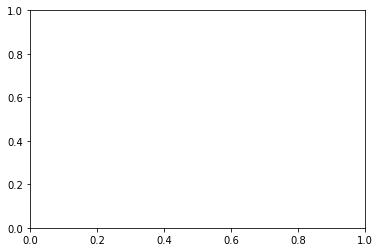

In [14]:
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)    
plt.show()